In [1]:
!pip install pipeline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline
url = 'https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv'
data = pd.read_csv(url)
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [12]:
data.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,Target Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [18]:
min=data.min()

In [20]:
max=data.max()

In [42]:
df=data.copy()

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Filtering data between Q1 - 1.5*IQR and Q3 + 1.5*IQR
    df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtered

# Remove outliers
df_cleaned= remove_outliers_iqr(df)

# Check the number of rows before and after removing outliers
print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_cleaned.shape)

Original dataset shape: (17898, 9)
Dataset shape after removing outliers: (13171, 9)


In [36]:
df.columns = ['IP Mean','IP Sd','IP Kurtosis','IP Skewness','DM-SNR Mean','DM-SNR Sd','DM-SNR Kurtosis','DM-SNR Skewness','Target Class']
df.tail()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,Target Class
17884,106.875000,47.571328,0.199440,0.284964,3.079431,20.984455,8.427475,78.259366,0
17890,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
17892,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [37]:
df['Target Class'].value_counts()

,count
Target Class,
0,13171


Text(0.5, 1.0, 'DM-SNR Mean')

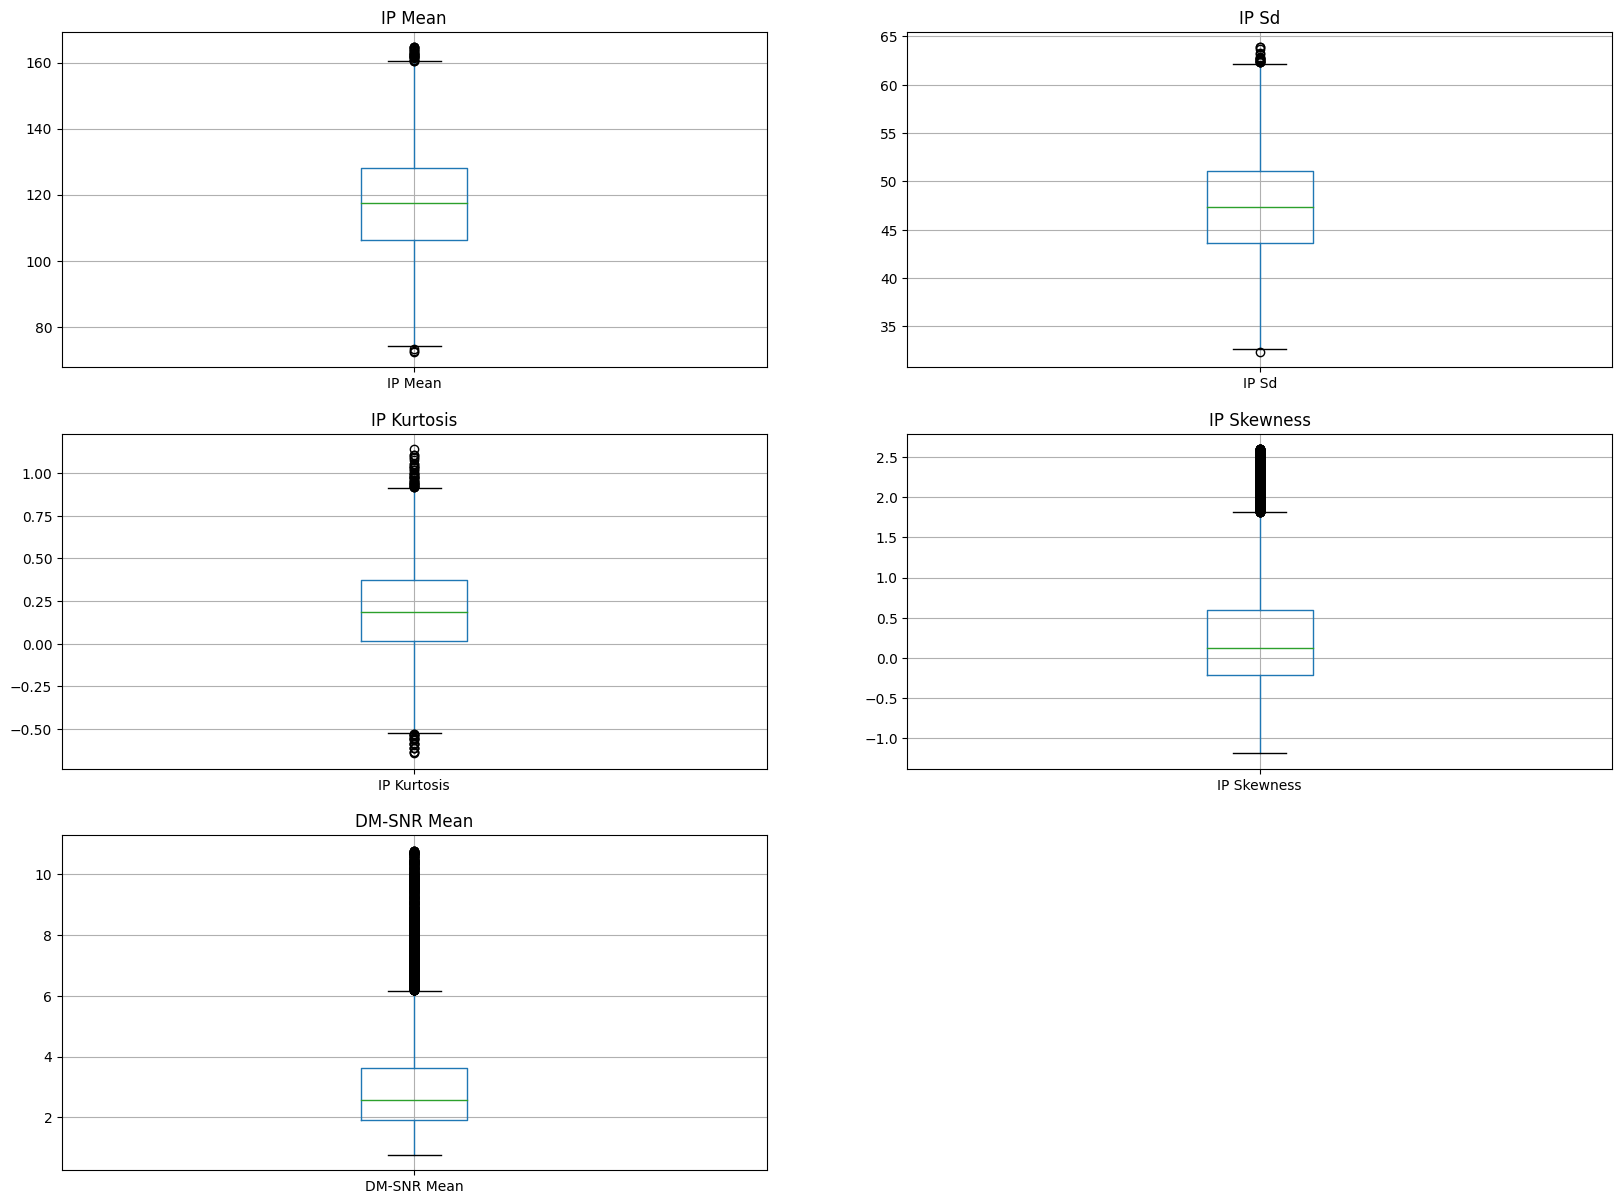

In [43]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
fig = df_cleaned.boxplot(column='IP Mean')
plt.title('IP Mean')
plt.subplot(4, 2, 2)
fig = df_cleaned.boxplot(column='IP Sd')
plt.title('IP Sd')
plt.subplot(4, 2, 3)
fig = df_cleaned.boxplot(column='IP Kurtosis')
plt.title('IP Kurtosis')
plt.subplot(4, 2, 4)
fig = df_cleaned.boxplot(column='IP Skewness')
plt.title('IP Skewness')
plt.subplot(4, 2, 5)
fig = df_cleaned.boxplot(column='DM-SNR Mean')
plt.title('DM-SNR Mean')

In [44]:
x = data.drop('Target Class', axis =1)
y = data['Target Class']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3)
x_train.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
1024,81.601562,44.279358,0.760395,1.211753,2.762542,15.547332,7.963527,84.572362
16017,103.890625,44.895927,0.381540,0.506224,1.211538,12.954302,13.923102,226.610165
6624,89.757812,38.911307,0.571630,1.970540,3.551003,20.784809,7.451688,63.270824
6800,103.703125,49.093877,0.451433,-0.149952,1.214047,11.627697,13.552656,231.490771
9272,82.960938,37.249665,0.829560,2.496360,1.911371,13.981193,10.512145,135.449083


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train = pd.DataFrame(x_train, columns = x.columns)
x_test = pd.DataFrame(x_test, columns = x.columns)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR()
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [1, 10],'degree': [2],'coef0': [ 1.0],'gamma': [0.1,1]}
grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, cv = 2)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)


{'C': 10, 'coef0': 1.0, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


AttributeError: 'GridSearchCV' object has no attribute 'best_score'

In [49]:
print(grid_search.best_score_)

0.7569495773464568


In [50]:
from sklearn.decomposition import PCA
x_standardized=sc.fit_transform(x)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(x_standardized)
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

In [58]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X = data.drop('Target Class', axis =1)
y = data['Target Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
lr_classifier = LogisticRegression(max_iter=200)

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('dt', dt_classifier),
        ('rf', rf_classifier),
        ('lr', lr_classifier)
    ],
    voting='hard'  # or 'soft' for probability-based voting
)

# Fit the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Evaluate the model
predictions = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.98


In [57]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X = data.drop('Target Class', axis =1)
y = data['Target Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
lr_classifier = LogisticRegression(max_iter=200)  # Ensure convergence

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('dt', dt_classifier),
        ('rf', rf_classifier),
        ('lr', lr_classifier)
    ],
    voting='hard'  # 'soft' can be used for probability-based voting
)

# Fit the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Evaluate the Voting Classifier
voting_predictions = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f'Voting Classifier Accuracy: {voting_accuracy:.2f}')

# Check individual estimator accuracy
estimators = voting_classifier.estimators_
estimator_names = ['Decision Tree', 'Random Forest', 'Logistic Regression']

for name, estimator in zip(estimator_names, estimators):
    # Fit each estimator
    estimator.fit(X_train, y_train)
    # Get predictions
    predictions = estimator.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')


Voting Classifier Accuracy: 0.98
Decision Tree Accuracy: 0.97
Random Forest Accuracy: 0.98
Logistic Regression Accuracy: 0.98
